# Collection of completed code 
#### This jupyter notebook is a collection of each individual piece of code that is required for my individual project. It's used as a timeline to reference and work out what code has been completely written

## Wednesday 18th June - Steady Sate Equation Solve

We take the initial differential equation for the thin films and integrate it to get 
$$
\frac{\partial h}{\partial t} = h^3\frac{\partial^3h}{\partial x^3} + h = \tilde{Q},
$$
where $\tilde{Q}$ is the dimensionless flux, to be constant at $q(x=0)$ and experimented with. We set $\frac{\partial h}{\partial t} = 0,$ then transform the ODE into a system of first order ODEs, where
$$
\vec{y} = \begin{bmatrix}
            y_1 = h \\ y_2 = \frac{dh}{dx} \\ y_3 = \frac{d^2h}{dx^2}
            \end{bmatrix}
$$

meaning 

$$
\dot{\vec{y}} = \begin{bmatrix}
            \dot{y_1} = y_2 \\ \dot{y_2} = y_3 \\ \dot{y_3} = \frac{\tilde{Q}-y_1}{y_1^3}.
            \end{bmatrix}
$$
We also have the boundary conditions
$$
\begin{aligned}
y_1(x=0) = 1 \\
y_2(x=L) = 0.5 \\
y_1(x=L) = \tilde{Q},
\end{aligned}
$$

We then implement this using scipy's ```solve_bvp``` function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cffi.model import Q_RESTRICT
from scipy.integrate import solve_bvp

In [96]:
N = 1_000                                       # Number of grid points
Q = 0.9
h_0 = 1.0

##### We define the system of ODEs and the BCs

In [97]:
def ODE(x, y, a, Q=Q):
    """
    Split ODE into three first order ODEs, returns the derivative of the vector y linking the ODEs.
    """
    dy_3 = (Q-y[0])/(y[0]**a)
    return np.array([y[1], y[2], dy_3])

def bc(x_zero, x_L, Q=Q):
    """
    Boundary conditions for the BVP to show the height at each boundary and flux at x=0.
    """
    return np.array([x_zero[0]-1, x_L[2], x_L[0]-Q])

##### Define the solution and plotting functions

In [118]:
def solver(q, L, a=3):
    """
    Uses scipy integrate to solve the boundary value problem
    """
    x = np.linspace(0, L, N)
    y = np.zeros((3, x.size))
    y[0] = h_0
    solution = solve_bvp(lambda x,y: ODE(x, y, a=a, Q=q), lambda x,y: bc(x, y, Q=q), x, y, tol=1e-5, max_nodes=1_000_000)
    return solution

def plot_solution(solution, q, axes=None):
    """
    Plots the solution to the numerically solved thin film equation, adds a diagram of the extruder also
    """
    if axes is None:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    axes.plot(solution.x, solution.y[0], color='g', linestyle='-', linewidth=2)
    axes.set_title(f'Solution to BVP (Q={q}) \n $h(x=0)={h_0}$')
    

##### Then run it all!

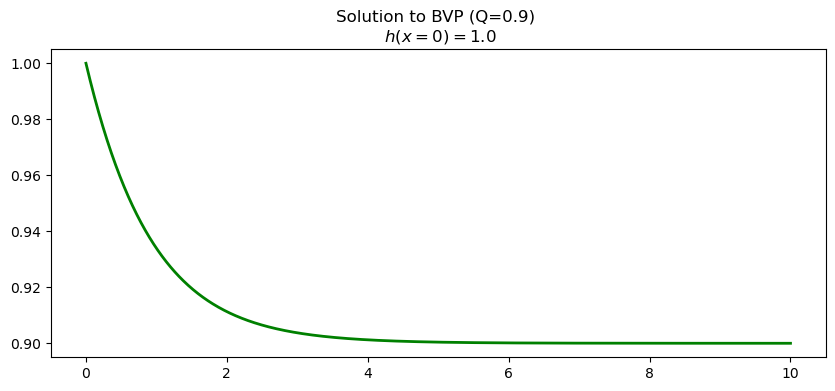

In [104]:
solution = solver(q=Q, L = 10, a=3)
plot_solution(solution, Q)

#### Experimentation with different fluxes 

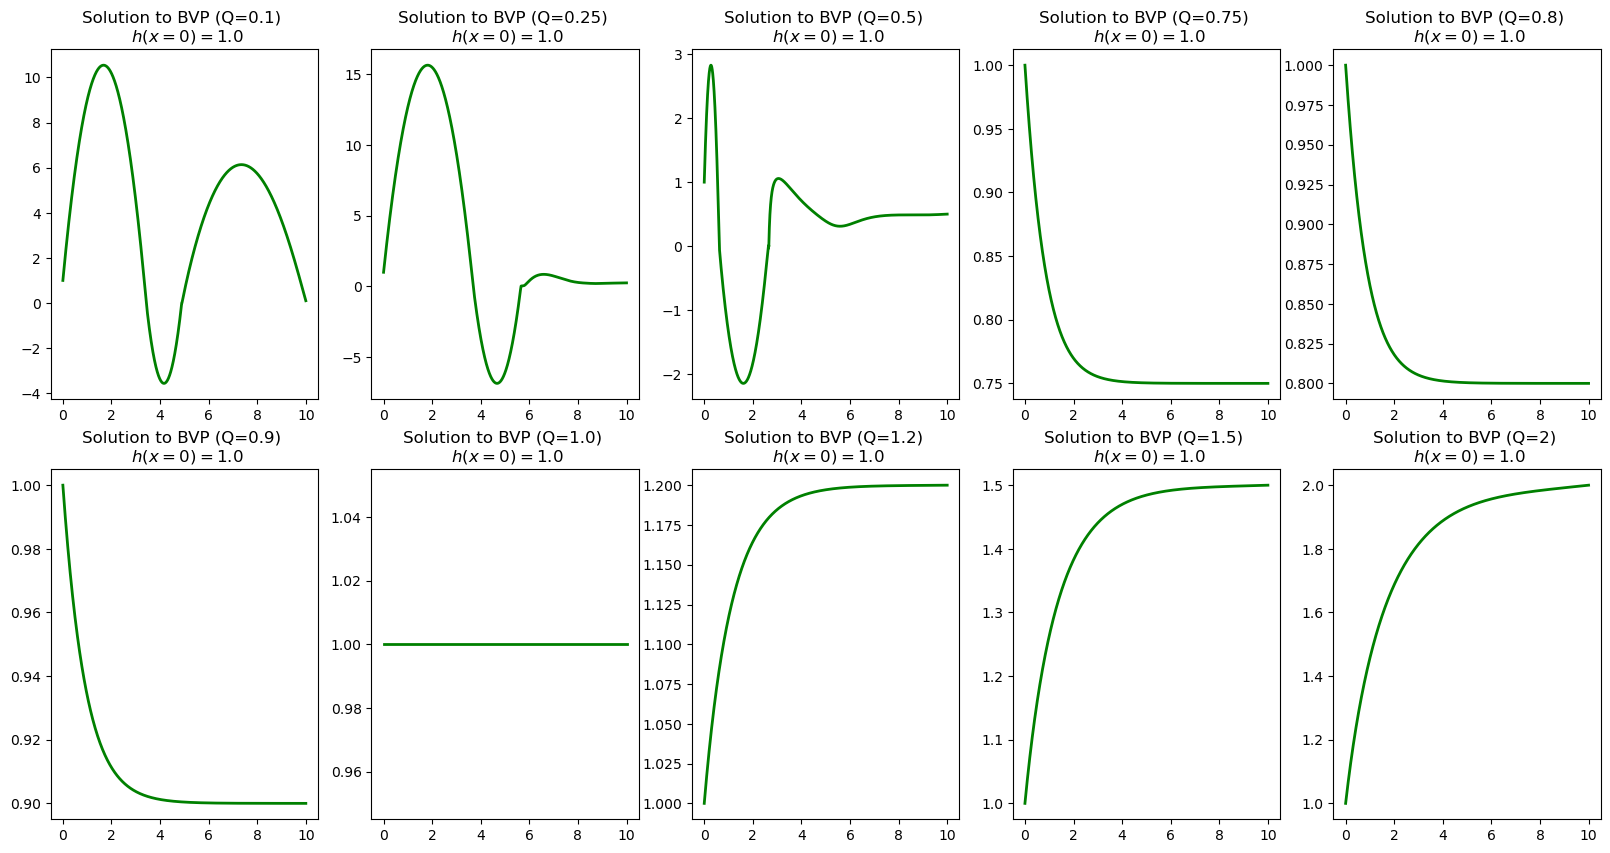

In [105]:
Q_list = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1.0, 1.2, 1.5, 2]

rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
count = 0
for i in range(rows):
    for j in range(cols):
        Q_ = Q_list[count]
        solution = solver(q=Q_, L=10, a=3)
        plot_solution(solution, Q_, ax[i, j])
        count += 1

### Summarising plots:
    2 Plots h on x
        1. Varying Q against an L Q = [], on same plot linear solution as dashed line
        2. Varying L for one value of Q to show how L affects teh solution slightly. 

Success! Both solutions were found

Success! Both solutions were found

Success! Both solutions were found

Success! Both solutions were found

Success! Both solutions were found



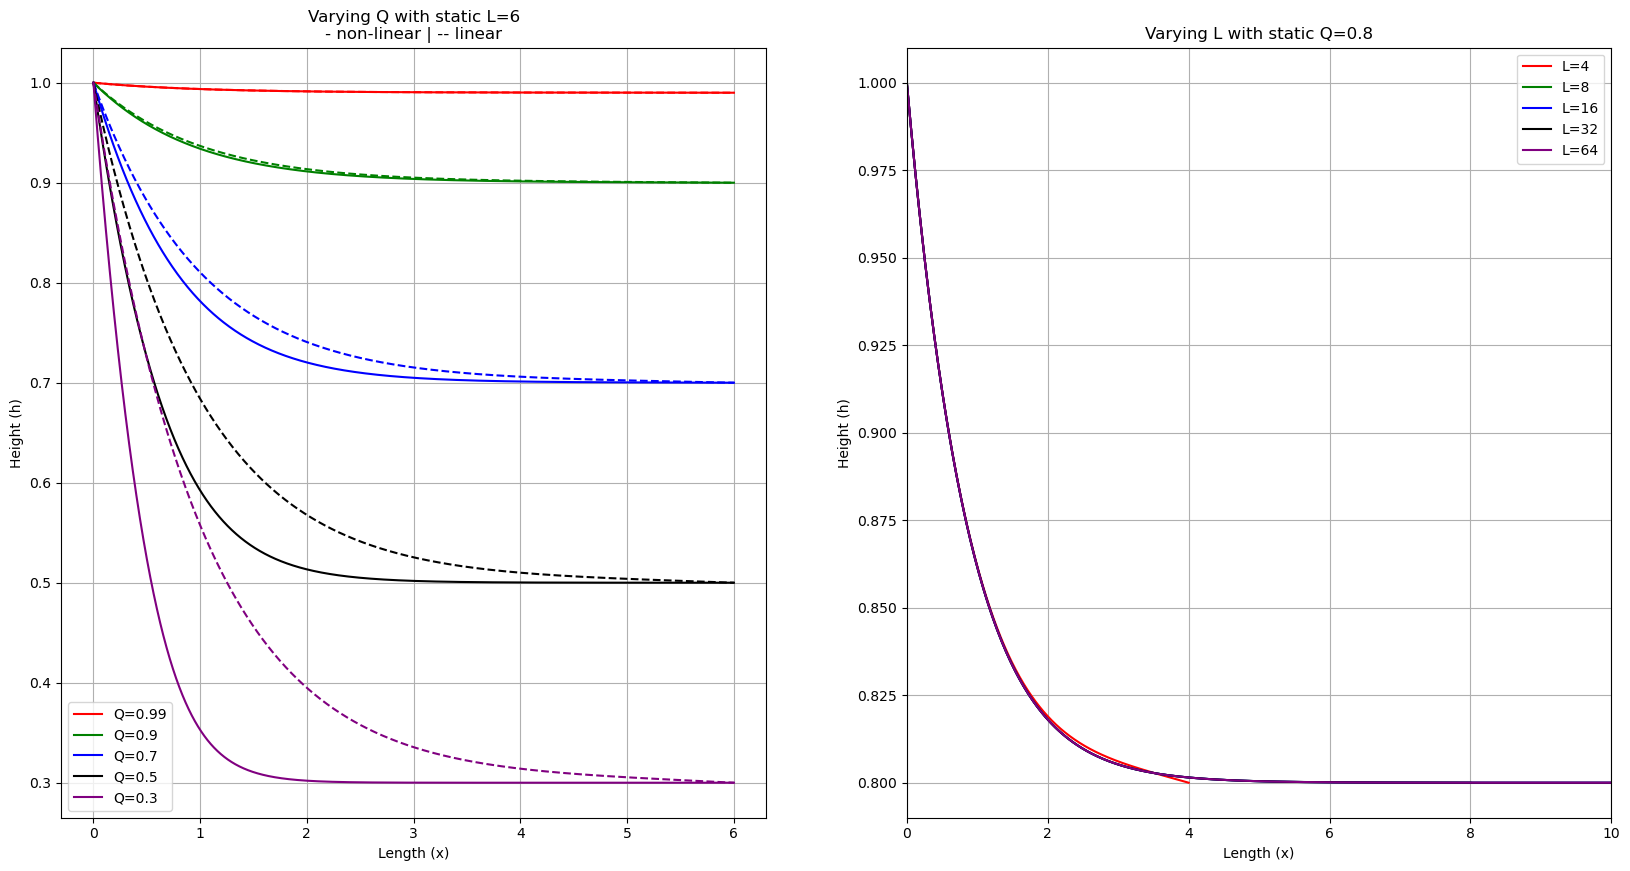

In [144]:
# Varying Q 
static_L = 6
static_Q = 0.8

Q = [0.99, 0.9, 0.7, 0.5, 0.3]
L = [4, 8, 16, 32, 64]

colors = ['red', 'green', 'blue', 'black', 'purple']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

assert len(Q) == len(L)
for i in range(len(Q)):
    q = Q[i]
    l = L[i]
    solution_static_L = solver(q=q, L=static_L)
    solution_static_Q = solver(q=static_Q, L=l)

    solution_static_L_linear = solver(q=q, L=static_L, a=0)
    solution_static_Q_linear = solver(q=static_Q, L=l, a=0)

    # Non-linear plots
    axes[0].plot(solution_static_L.x, solution_static_L.y[0], label=f"Q={q}", color=colors[i], linestyle='-')
    axes[1].plot(solution_static_Q.x, solution_static_Q.y[0], label=f"L={l}", color=colors[i], linestyle='-')

    # Linear plots
    axes[0].plot(solution_static_L_linear.x, solution_static_L_linear.y[0], color=colors[i], linestyle='--')

    if solution_static_L.status == 1 or solution_static_Q.status == 1:
        print("Error found, a solution did not succeed to find a solution")
        print(f"Solution 1: {solution_static_L.status} | Solution 2: {solution_static_Q.status}\n")
    else:
        print(f"Success! Both solutions were found\n")

axes[0].set_title(f"Varying Q with static L={static_L}\n- non-linear | -- linear")
axes[1].set_title(f'Varying L with static Q={static_Q}')

axes[0].legend()
axes[1].legend()

axes[0].grid()
axes[1].grid()

axes[1].set_xlim(0, 10)

axes[0].set_xlabel('Length (x)')
axes[0].set_ylabel('Height (h)')

axes[1].set_xlabel('Length (x)')
axes[1].set_ylabel('Height (h)')

fig.savefig('/Users/jackroberts/Documents/PMSC/IndProj/Master/texts/results/figures/steady-state-newtonian-no-disjoining-pressure.png', bbox_inches='tight')